# Analyse de données  <a class="tocSkip">

L'objectif de ce notebook est de mieux comprendre les données et analyses de l'article *Mutation dynamics and fitness effects followed in single cells*, par Lydia Robert, Jean Ollion, Jerome Robert, Xiaohu Song, Ivan Matic et Marina Elez (Science, 2018).

# Data exploration

In [1]:
library("gridExtra")
library("ggplot2")
library("zoo")


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric





## Mutation Accumulation experiment : data_microMA
### Files description

On se base sur les données fournies en annexe de l'article, ainsi que leur description.

The folder contains 4 files giving the evolution of growth rate during one representative $\mu$MA experiment for 4 different strains, *mutH*, *mutT*, WT, MF1 (dataset_microMA_...) . Each column contains the values of one variable (time, generation or growth rate) for each time step for the mother cell of a single microchannel. The first two lines (i.e. first two values for each column) give respectively the index of the field of view and the index of the microchannel (~15channels for each field of view).

In [2]:
microMA_WT <- read.csv2("doi_10/All_data/data_microMA/dataset_microMA_WT.csv")
microMA_MutH <- read.csv2("doi_10/All_data/data_microMA/dataset_microMA_MutH.csv")
microMA_MF1 <- read.csv2("doi_10/All_data/data_microMA/dataset_microMA_MF1.csv")
microMA_MutT <- read.csv2("doi_10/All_data/data_microMA/dataset_microMA_MutT.csv")

# Split the channel information (first 2 lines) from the growth rates
microMA_WT_channels <- microMA_WT[c(1,2),]
microMA_WT <- microMA_WT[-c(1,2),]
microMA_MutH_channels <- microMA_MutH[c(1,2),]
microMA_MutH <- microMA_MutH[-c(1,2),]
microMA_MF1_channels <- microMA_MF1[c(1,2),]
microMA_MF1 <- microMA_MF1[-c(1,2),]
microMA_MutT_channels <- microMA_MutT[c(1,2),]
microMA_MutT <- microMA_MutT[-c(1,2),]

In [3]:
tail(microMA_MutH[,1:9], 10)

time generation growth.rate time.1 generation.1 growth.rate.1 time.2
993  3960 182        0.02770213  3960   121          0.01443289    3960  
994  3964 182        0.02770213  3964   121          0.01443289    3964  
995  3968 182        0.02770213  3968   122          0.01675265    3968  
996  3972 182        0.02770213  3972   122          0.01675265    3972  
997  3976 182        0.02770213  3976   122          0.01675265    3976  
998  3980 183        0.02867049  3980   122          0.01675265    3980  
999  3984 183        0.02867049  3984   122          0.01675265    3984  
1000 3988 183        0.02867049  3988   122          0.01675265    3988  
1001 3992 183        0.02867049  3992   122          0.01675265    3992  
1002 3996 183        0.02867049  3996   122          0.01675265    3996  
     generation.2 growth.rate.2
993  163          0.001285689  
994  163          0.001285689  
995  164          0.026031184  
996  164          0.026031184  
997  164          0.026031184  
998  164          0.026031184  
999  165          0.025671465  
1000 165          0.025671465  
1001 165          0.025671465  
1002 165          0.025671465

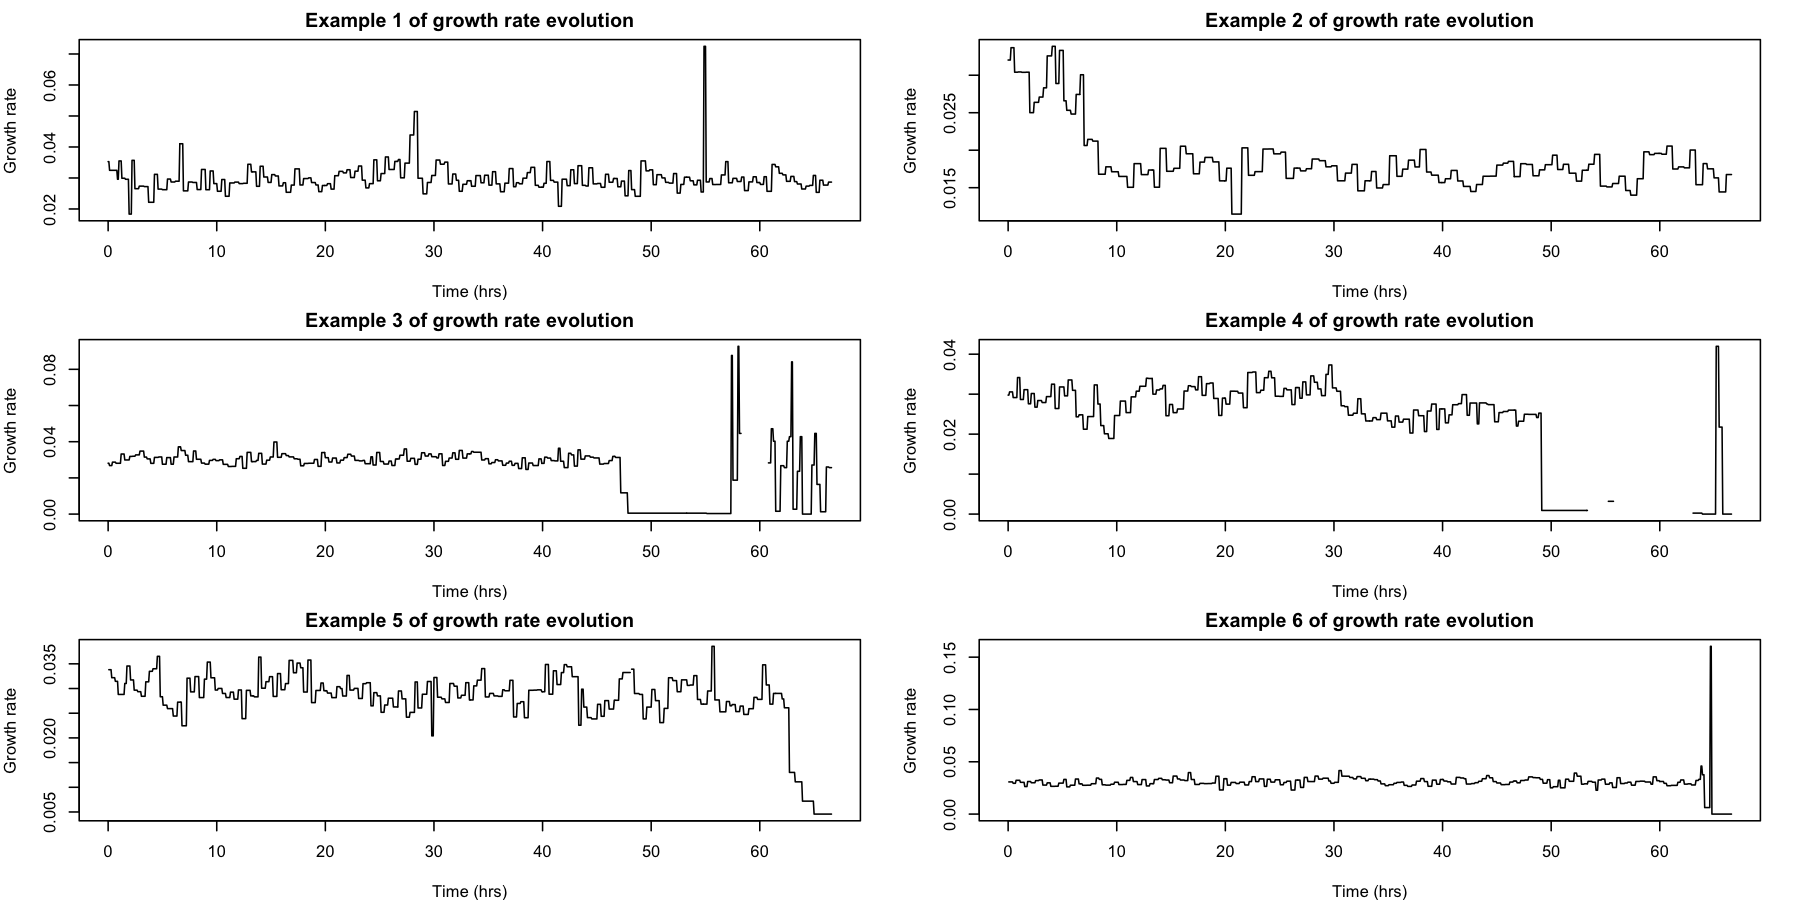

In [4]:
#png("Img/Growth_rates_examples.png", width = 800, height = 400)

microMA_MutH_growthRates <- microMA_MutH[seq(3, dim(microMA_MutH)[2], 3)]
microMA_MutH_growthRates[microMA_MutH_growthRates<0] <- NA  # Set negative growth rates to NA

microMA_WT_growthRates <- microMA_WT[seq(3, dim(microMA_WT)[2], 3)]
microMA_WT_growthRates[microMA_WT_growthRates<0] <- NA  # Set negative growth rates to NA

microMA_MutT_growthRates <- microMA_MutT[seq(3, dim(microMA_MutT)[2], 3)]
microMA_MutT_growthRates[microMA_MutT_growthRates<0] <- NA  # Set negative growth rates to NA

microMA_MF1_growthRates <- microMA_MF1[seq(3, dim(microMA_MF1)[2], 3)]
microMA_MF1_growthRates[microMA_MF1_growthRates<0] <- NA  # Set negative growth rates to NA


par(mfrow=c(3,2), mar = c(4, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)

for (i in 1:6){
    plot(microMA_MutH$time/60, microMA_MutH_growthRates[, i], type="l", xlab = "Time (hrs)", ylab = "Growth rate", main = paste("Example",i,"of growth rate evolution"))
}

#dev.off()

## Traitement des données :

Full relevant text:

* The segmentation errors generated by image analysis can create aberrant, very low or high growth rates. Therefore, we filtered our data in the following way. For each channel and each generation, we calculated the median of the growth rates for earlier generations (M bef ore ) and subsequent generations (M af ter ). Growth rate estimates that are clearly aberrant (as confirmed by visual inspection of images) are either much larger than both M bef ore and M af ter or much smaller than both M bef ore and M af ter (Note that M bef ore and M af ter can be significantly different because of the occurrence of deleterious mutations). Therefore for each generation, we remove the value of the growth rate μ from the data if it di↵ers from both M af ter and M bef ore by more than a threshold value T. The value T was fixed at 30% of the average growth rate in the experiment, corresponding to the mean+/ 2standard deviation of the variable μ M af ter (or equivalently μ M bef ore ; both variables follow a distribution that is well approximated by a gaussian). The datasets for all strains (WT mutH, mutT, and MF1 such as plotted in Figure 3A and Figure S8) were all filtered using the same procedure. **was done afterwards**

* In order to eliminate any image analysis errors that could bias our results and would not have been removed by this filtering procedure, we selected all the channels where a growth rate smaller than 0.015 was detected and systematically checked by visual inspection cell segmentation and tracking on all the images corresponding to this channel. Therefore, small growth rate values are all valid measurements. **Can't be done**

* Death of slowly growing cells induces noise in DFE estimation (figure S14). Therefore, to estimate the DFE’s first moments (figure 3C and table S3) we used a subset of the data, restricted in time and containing only cells that do not die on this restricted time window (time points before 40 hours, only channels where the mother cell is still alive at 44 hours). For selecting such data we use an automatic procedure. If the growth rate of a cell is below 0.003 (10% of its initial value) during more than 80 minutes, the cell and its potential descendants are removed from the data. We checked that the results obtained through this automatic procedure are identical to those obtained when removing dead cells detected by visual inspection of the phase contrast images, as shown in table S8 for a representative mutH experiment. **Was done first (see email)**

### Deletion of slowly growing/dead cells
* Death of slowly growing cells induces noise in DFE estimation (figure S14). Therefore, to estimate the DFE’s first moments (figure 3C and table S3) we used a subset of the data, restricted in time and containing only cells that do not die on this restricted time window (time points before 40 hours, only channels where the mother cell is still alive at 44 hours). **For selecting such data we use an automatic procedure. If the growth rate of a cell is below 0.003 (10% of its initial value) during more than 80 minutes, the cell and its potential descendants are removed from the data**. We checked that the results obtained through this automatic procedure are identical to those obtained when removing dead cells detected by visual inspection of the phase contrast images, as shown in table S8 for a representative mutH experiment. 

```
tmin <- 40*1
tmax <- 40*15
threshold <- 0.003

deletion_dead_cells <- function(dataset){
    lslow=c()
    ncells <- dim(dataset)[2]
    for(cell in 1:ncells){
        tslow <- 0
        for(t in 1:(tmax+20)){
            if (is.na(dataset[t,cell])){
                tslow <- tslow+1
            }
            else if(dataset[t,cell] < threshold){
                tslow <- tslow+1
            }
            else if (tslow<20){
                tslow<-0
            }
        }
        if (tslow>=20){
            lslow=c(lslow,cell)
        }
    }
    print(paste("Nombre de cellules supprimées :", length(lslow)))
    print("Cellules supprimées :"); print(lslow)
    print(paste("Nombre de cellules de départ :", ncells))
    return (dataset[,-lslow])
}

microMA_MutH_growthRates_nodead <- deletion_dead_cells(microMA_MutH_growthRates)
print(dim(microMA_MutH_growthRates_nodead))

microMA_WT_growthRates_nodead <- deletion_dead_cells(microMA_WT_growthRates)
print(dim(microMA_WT_growthRates_nodead))

microMA_MutT_growthRates_nodead <- deletion_dead_cells(microMA_MutT_growthRates)
print(dim(microMA_MutT_growthRates_nodead))

microMA_MF1_growthRates_nodead <- deletion_dead_cells(microMA_MF1_growthRates)
print(dim(microMA_MF1_growthRates_nodead))
```

Code alternatif, qui ne prend pas en compte les NAs (sinon on peut supprimer des cellules avec juste une série de NAs) et n'impose pas la continité sur les 80h en dessous du seuil.

In [5]:
tmin=40*1
tmax=40*15
threshold <- 0.003

dead_cells_WT <- which(colSums(microMA_WT_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_WT_growthRates_nodead <- microMA_WT_growthRates[-dead_cells_WT]
print(paste("dead_cells_WT :", length(dead_cells_WT))); print(dim(microMA_WT_growthRates_nodead))

dead_cells_MutH <- which(colSums(microMA_MutH_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MutH_growthRates_nodead <- microMA_MutH_growthRates[-dead_cells_MutH]
print(paste("dead_cells_MutH :", length(dead_cells_MutH))); print(dim(microMA_MutH_growthRates_nodead))

dead_cells_MutT <- which(colSums(microMA_MutT_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MutT_growthRates_nodead <- microMA_MutT_growthRates[-dead_cells_MutT]
print(paste("dead_cells_MutT :", length(dead_cells_MutT))); print(dim(microMA_MutT_growthRates_nodead))

dead_cells_MF1 <- which(colSums(microMA_MF1_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MF1_growthRates_nodead <- microMA_MF1_growthRates[-dead_cells_MF1]
print(paste("dead_cells_MF1 :", length(dead_cells_MF1))); print(dim(microMA_MF1_growthRates_nodead))

[1] "dead_cells_WT : 189"
[1]  999 1062
[1] "dead_cells_MutH : 581"
[1] 1000  895
[1] "dead_cells_MutT : 497"
[1] 946 930
[1] "dead_cells_MF1 : 636"
[1] 668 202


In [29]:
sapply(microMA_WT_growthRates[dead_cells_WT], )

growth.rate.4   growth.rate.11   growth.rate.18   growth.rate.25 
             646              938              933              732 
  growth.rate.29   growth.rate.37   growth.rate.38   growth.rate.42 
             500              973              380              720 
  growth.rate.46   growth.rate.47   growth.rate.49   growth.rate.50 
             165              679              222              543 
  growth.rate.52   growth.rate.55   growth.rate.56   growth.rate.57 
             376              253              253              359 
  growth.rate.63   growth.rate.68   growth.rate.71   growth.rate.72 
             934              892              375              184 
  growth.rate.73   growth.rate.74   growth.rate.82   growth.rate.83 
             928              221              912              922 
  growth.rate.86   growth.rate.88   growth.rate.91   growth.rate.92 
             561              744                2              499 
  growth.rate.97   growth.rate.99  growth.rate.103  growth.rate.104 
             124              348              716              394 
 growth.rate.111  growth.rate.115  growth.rate.120  growth.rate.121 
             141              120              631              841 
 growth.rate.124  growth.rate.127  growth.rate.131  growth.rate.137 
             932               29              624               64 
 growth.rate.141  growth.rate.152  growth.rate.156  growth.rate.158 
             226              529              860              771 
 growth.rate.159  growth.rate.160  growth.rate.161  growth.rate.162 
             328              765              771                1 
 growth.rate.163  growth.rate.164  growth.rate.165  growth.rate.166 
             772              772              128              731 
 growth.rate.167  growth.rate.168  growth.rate.169  growth.rate.170 
             771              771              771              772 
 growth.rate.171  growth.rate.172  growth.rate.183  growth.rate.185 
             772              772              876              107 
 growth.rate.186  growth.rate.187  growth.rate.190  growth.rate.191 
             731              898              581              554 
 growth.rate.198  growth.rate.199  growth.rate.201  growth.rate.211 
             947              789              106              156 
 growth.rate.212  growth.rate.215  growth.rate.223  growth.rate.224 
             557              493              837                3 
 growth.rate.225  growth.rate.231  growth.rate.232  growth.rate.233 
               1              598              466              645 
 growth.rate.234  growth.rate.238  growth.rate.239  growth.rate.240 
             872              205              764              748 
 growth.rate.241  growth.rate.242  growth.rate.243  growth.rate.244 
             439              107              126              469 
 growth.rate.249  growth.rate.250  growth.rate.251  growth.rate.257 
             237              921              901              879 
 growth.rate.259  growth.rate.262  growth.rate.264  growth.rate.270 
              70              659              950               24 
 growth.rate.271  growth.rate.274  growth.rate.281  growth.rate.282 
             692              860              445              886 
 growth.rate.285  growth.rate.287  growth.rate.291  growth.rate.296 
             930              887              530              818 
 growth.rate.303  growth.rate.306  growth.rate.307  growth.rate.308 
             972              150                3              121 
 growth.rate.312  growth.rate.313  growth.rate.314  growth.rate.316 
             855              703               42              866 
 growth.rate.317  growth.rate.318  growth.rate.319  growth.rate.324 
               2              147               13              890 
 growth.rate.329  growth.rate.330  growth.rate.331  growth.rate.332 
             720              935              796              961 
 

In [33]:
matrix()

ERROR: Error in match.fun(FUN): l'argument "FUN" est manquant, avec aucune valeur par défaut


In [6]:
tmin=40*1
tmax=40*25
threshold <- 0.003
keep_cells <- TRUE  # wether to keep early cells even if the moth cell dies later
first_slow_cell <- function(x, threshold){min(which(x<threshold), na.rm=T)}

dead_cells_WT <- which(colSums(microMA_WT_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
if (keep_cells){
    microMA_WT_growthRates_nodead <- microMA_WT_growthRates
    first_
    microMA_WT_growthRates_nodead[]
}
else{
    microMA_WT_growthRates_nodead <- microMA_WT_growthRates[-dead_cells_WT]
}
print(paste("dead_cells_WT :", length(dead_cells_WT))); print(dim(microMA_WT_growthRates_nodead))

dead_cells_MutH <- which(colSums(microMA_MutH_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MutH_growthRates_nodead <- microMA_MutH_growthRates[-dead_cells_MutH]
print(paste("dead_cells_MutH :", length(dead_cells_MutH))); print(dim(microMA_MutH_growthRates_nodead))

dead_cells_MutT <- which(colSums(microMA_MutT_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MutT_growthRates_nodead <- microMA_MutT_growthRates[-dead_cells_MutT]
print(paste("dead_cells_MutT :", length(dead_cells_MutT))); print(dim(microMA_MutT_growthRates_nodead))

dead_cells_MF1 <- which(colSums(microMA_MF1_growthRates[1:(tmax+20),]<threshold, na.rm=T)>20)
microMA_MF1_growthRates_nodead <- microMA_MF1_growthRates[-dead_cells_MF1]
print(paste("dead_cells_MF1 :", length(dead_cells_MF1))); print(dim(microMA_MF1_growthRates_nodead))

[1] "dead_cells_WT : 438"
[1] 999 813
[1] "dead_cells_MutH : 1049"
[1] 1000  427
[1] "dead_cells_MutT : 883"
[1] 946 544
[1] "dead_cells_MF1 : 659"
[1] 668 179


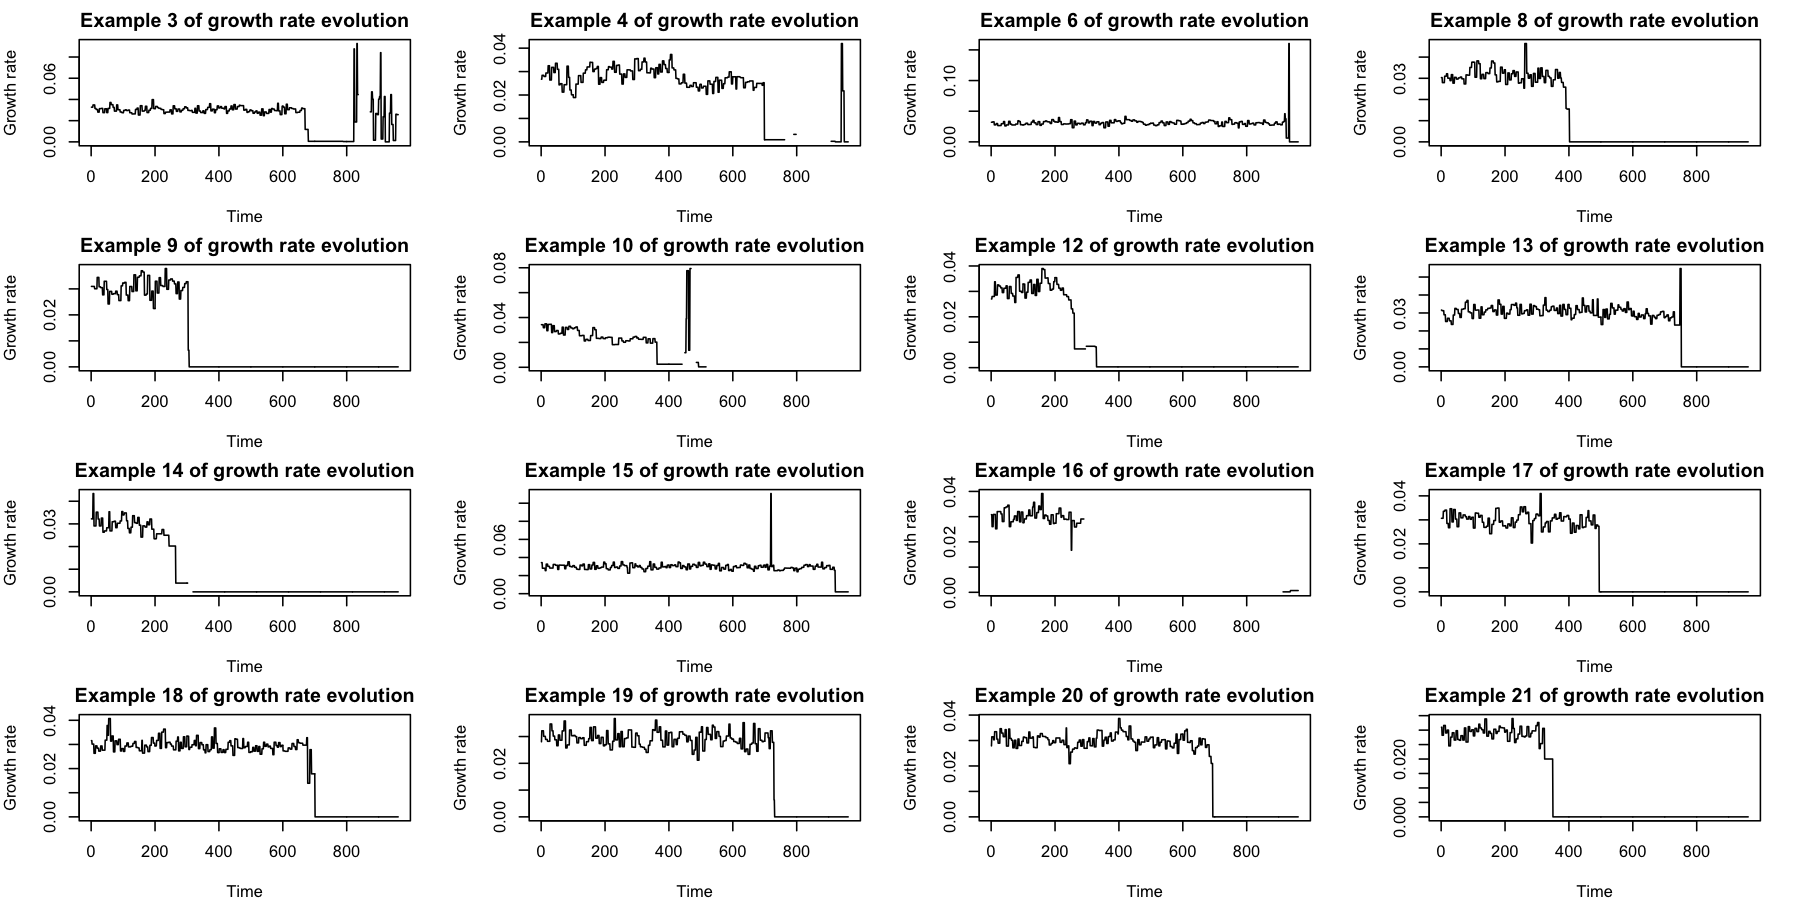

In [7]:
# Let us look at some examples:

par(mfrow=c(4,4), mar = c(4, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)

for (i in head(dead_cells_MutH, 16)){
    plot(microMA_MutH_growthRates[tmin:tmax, i], type="l", xlab = "Time", ylab = "Growth rate", main = paste("Example",i,"of growth rate evolution"))
}

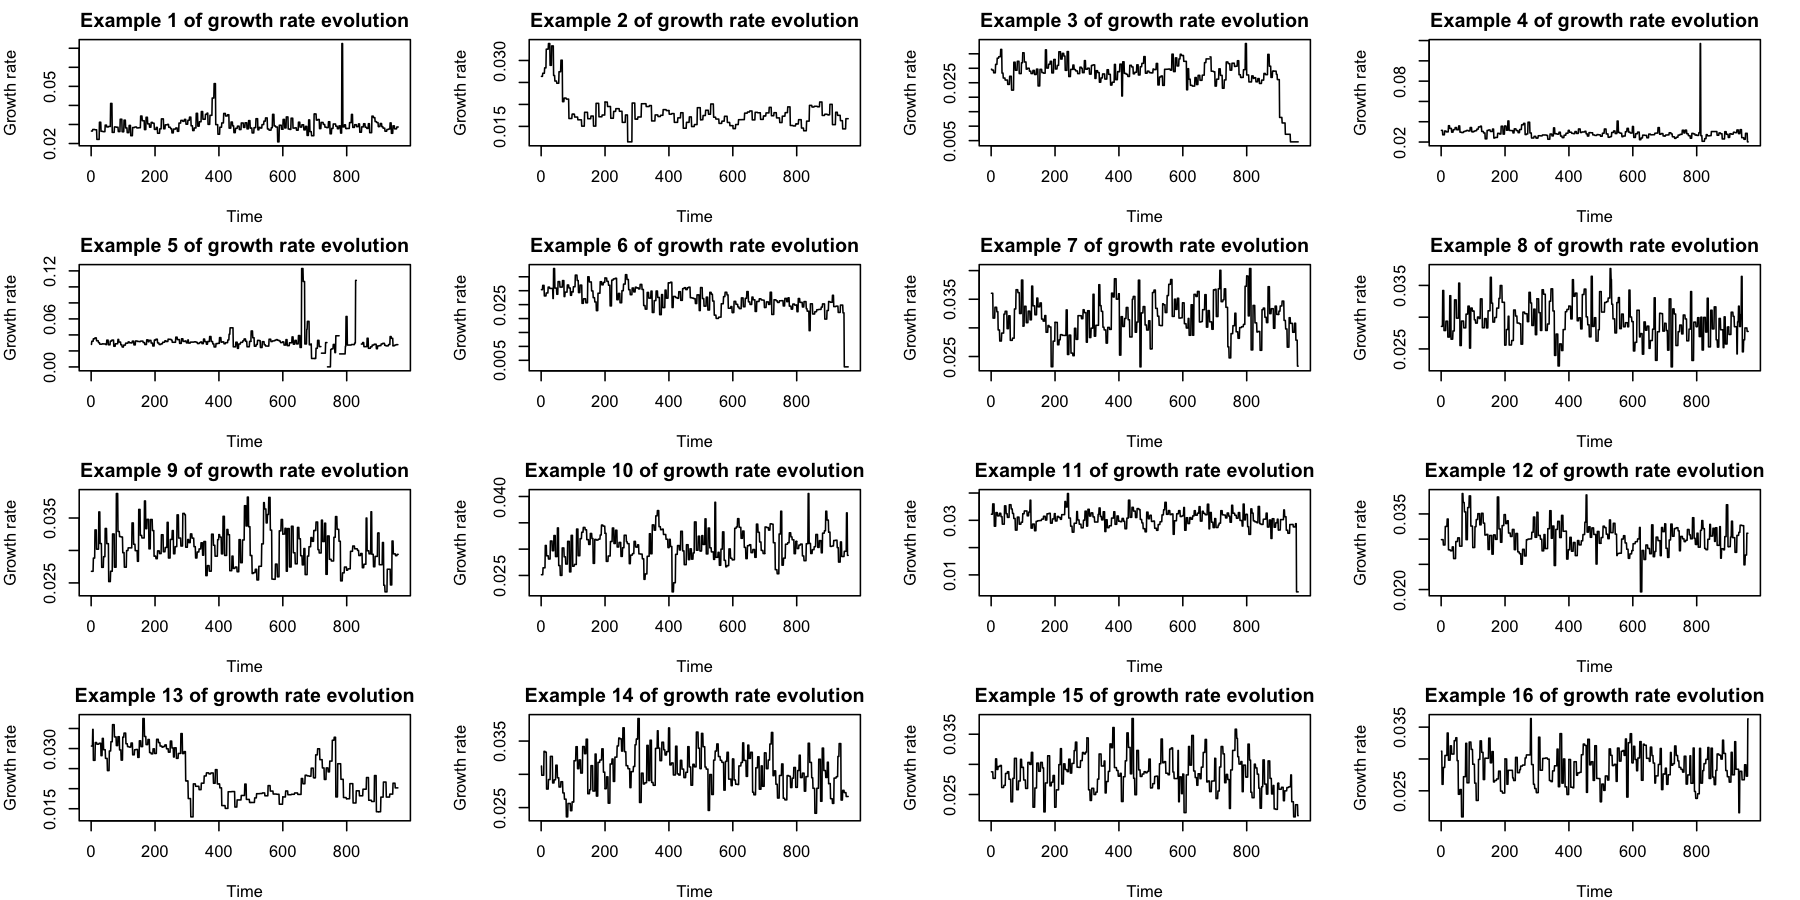

In [8]:
# Let us look at some examples:

par(mfrow=c(4,4), mar = c(4, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)

for (i in 1:16){
    plot(microMA_MutH_growthRates_nodead[tmin:tmax, i], type="l", xlab = "Time", ylab = "Growth rate", main = paste("Example",i,"of growth rate evolution"))
}

Cette mise au point permet de supprimer environ 1/3 des cellules pour MutH. C'est beaucoup !

### Deletion of aberrant values

The segmentation errors generated by image analysis can create aberrant, very low or high growth rates. Therefore, we filtered our data in the following way. 

* For each channel and each generation, we **calculated the median of the growth rates for earlier generations (M bef ore ) and subsequent generations (M af ter )**. Growth rate estimates that are clearly aberrant (as confirmed by visual inspection of images) are either much larger than both M bef ore and M af ter or much smaller than both M bef ore and M af ter (Note that M bef ore and M af ter can be significantly different because of the occurrence of deleterious mutations). 

* **Therefore for each generation, we remove the value of the growth rate μ from the data if it di↵ers from both M af ter and M bef ore by more than a threshold value T. The value T was fixed at 30% of the average growth rate in the experiment**, corresponding to the mean+/ 2standard deviation of the variable μ M af ter (or equivalently μ M bef ore ; both variables follow a distribution that is well approximated by a gaussian). The datasets for all strains (WT mutH, mutT, and MF1 such as plotted in Figure 3A and Figure S8) were all filtered using the same procedure.


```
detect_aberrant_GR <- function(i, L){
    mu <- L[i]
    
    if (i>1){
        M_before <- median(L[max(1,i-1000):(i-1)], na.rm = T)
    }else{
        M_before <- mu
    }
    
    if (i<length(L)){
        M_after <- median(L[i+1:min(length(L),i+1000)], na.rm = T)
    }else{
        M_after <- mu
    }
    
    T <- 0.3*mean(L, na.rm = T) # threshold
    
    if (anyNA(c(mu, M_before, M_after))){ 
        return (TRUE) 
    }
    
    return((mu - M_before > T & mu - M_after > T)|(mu - M_before < -T & mu - M_after < -T))
}

microMA_MutH_growthRates_nodead_noab <- microMA_MutH_growthRates_nodead
for (i in 1:dim(microMA_MutH_growthRates_nodead_noab)[2]){
    L <- microMA_MutH_growthRates_nodead_noab[,i]
    microMA_MutH_growthRates_nodead_noab[sapply(1:length(L), detect_aberrant_GR, L = L),i] <- NA
}

microMA_WT_growthRates_nodead_noab <- microMA_WT_growthRates_nodead
for (i in 1:dim(microMA_WT_growthRates_nodead_noab)[2]){
    L <- microMA_WT_growthRates_nodead_noab[,i]
    microMA_WT_growthRates_nodead_noab[sapply(1:length(L), detect_aberrant_GR, L = L),i] <- NA
}

microMA_MutT_growthRates_nodead_noab <- microMA_MutT_growthRates_nodead
for (i in 1:dim(microMA_MutT_growthRates_nodead_noab)[2]){
    L <- microMA_MutT_growthRates_nodead_noab[,i]
    microMA_MutT_growthRates_nodead_noab[sapply(1:length(L), detect_aberrant_GR, L = L),i] <- NA
}
microMA_MF1_growthRates_nodead_noab <- microMA_MF1_growthRates_nodead
for (i in 1:dim(microMA_MF1_growthRates_nodead_noab)[2]){
    L <- microMA_MF1_growthRates_nodead_noab[,i]
    microMA_MF1_growthRates_nodead_noab[sapply(1:length(L), detect_aberrant_GR, L = L),i] <- NA
}
```

In [9]:
detect_aberrant_GR <- function(df, width){
    # Rolling medians with a kernel aligned to the left or the right to each value
    M_before <- rollapply(df, width=width, median, align = 'left', na.rm = TRUE, fill = NA, partial = TRUE)
    M_after <- rollapply(df, width=width, median, align = 'right', na.rm = TRUE, fill = NA, partial = TRUE)

    # Threashold = mean growth rate (for non-zero values)
    T <- microMA_MutH_growthRates_nodead
    T[T==0] <- NA
    T <- 0.3*colMeans(T, na.rm=TRUE)

    return((df - M_before > T & df - M_after > T)|(df - M_before < -T & df - M_after < -T))
}

width=301

microMA_WT_growthRates_nodead_noab <- microMA_WT_growthRates_nodead
microMA_WT_growthRates_nodead_noab[detect_aberrant_GR(microMA_WT_growthRates_nodead_noab, width)] <- NA

microMA_MutH_growthRates_nodead_noab <- microMA_MutH_growthRates_nodead
microMA_MutH_growthRates_nodead_noab[detect_aberrant_GR(microMA_MutH_growthRates_nodead_noab, width)] <- NA

microMA_MutT_growthRates_nodead_noab <- microMA_MutT_growthRates_nodead
microMA_MutT_growthRates_nodead_noab[detect_aberrant_GR(microMA_MutT_growthRates_nodead_noab, width)] <- NA

microMA_MF1_growthRates_nodead_noab <- microMA_MF1_growthRates_nodead
microMA_MF1_growthRates_nodead_noab[detect_aberrant_GR(microMA_MF1_growthRates_nodead_noab, width)] <- NA

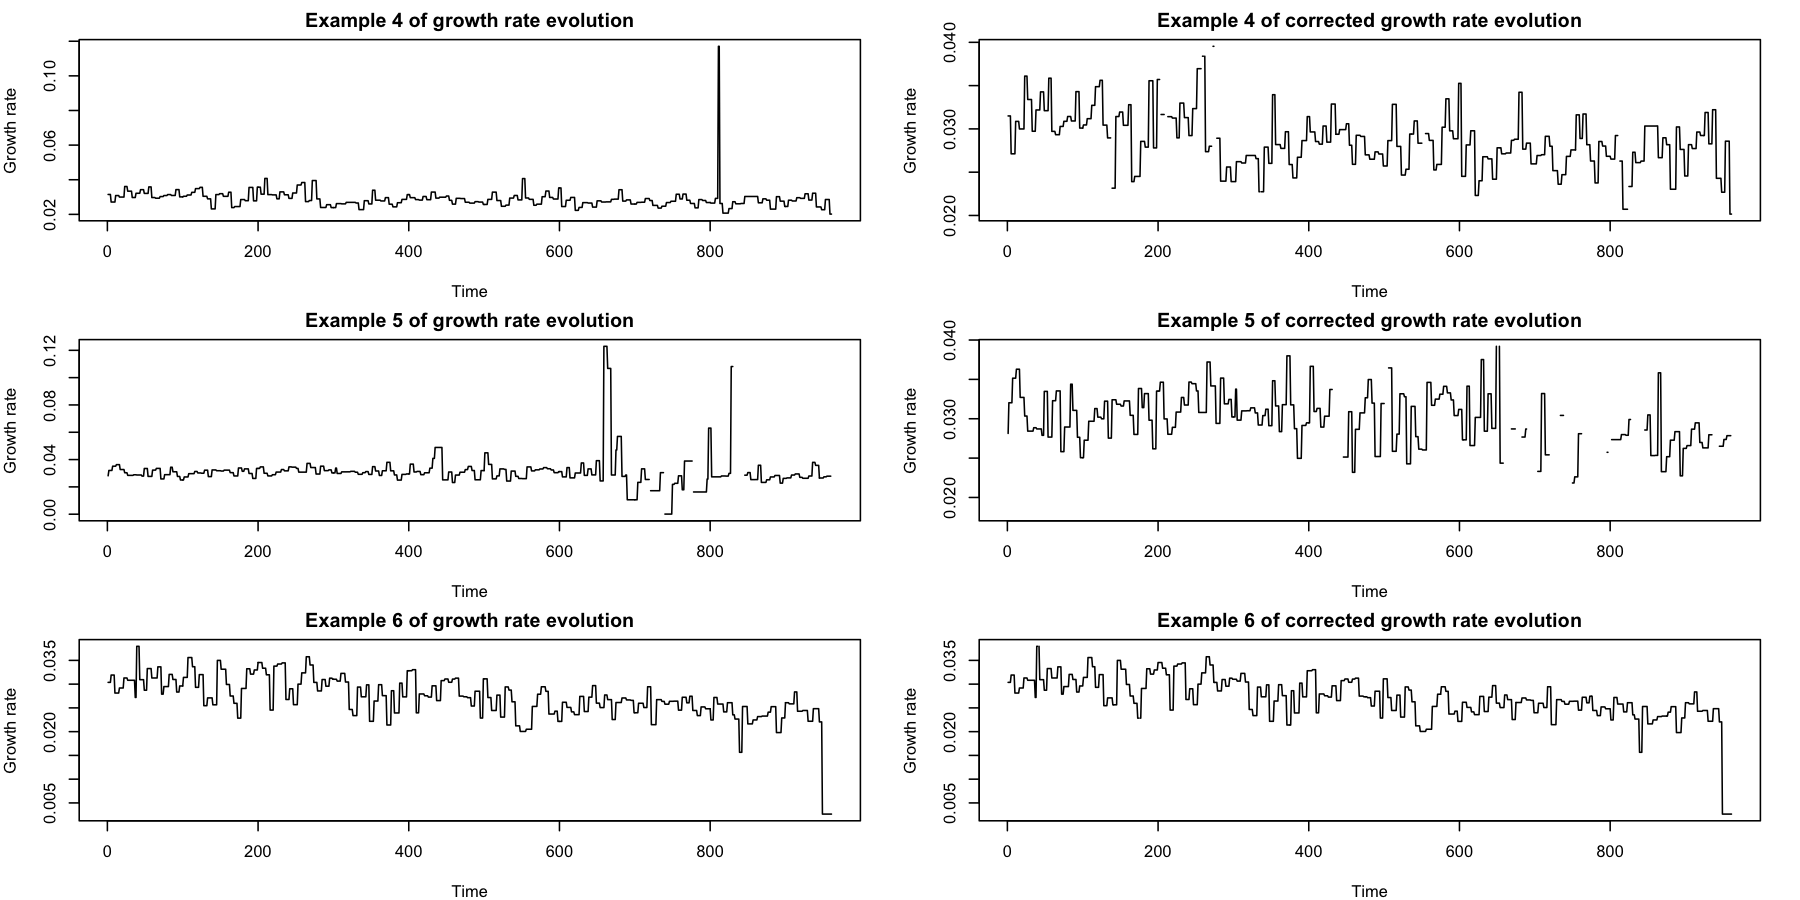

In [10]:
# Let us look at some examples:

par(mfrow=c(3,2), mar = c(4, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 6, repr.plot.res = 150)

for (i in 4:6){
    plot(microMA_MutH_growthRates_nodead[tmin:tmax, i], type="l", xlab = "Time", ylab = "Growth rate", main = paste("Example",i,"of growth rate evolution"))
    plot(microMA_MutH_growthRates_nodead_noab[tmin:tmax, i], type="l", xlab = "Time", ylab = "Growth rate", main = paste("Example",i,"of corrected growth rate evolution"))
}

In [11]:
write.csv2(microMA_WT_growthRates_nodead_noab, "Modified_data/data_microMA/dataset_microMA_WT_growthRates_nodead_noab.csv")
write.csv2(microMA_MutH_growthRates_nodead_noab, "Modified_data/data_microMA/dataset_microMA_MutH_growthRates_nodead_noab.csv")
write.csv2(microMA_MutT_growthRates_nodead_noab, "Modified_data/data_microMA/dataset_microMA_MutT_growthRates_nodead_noab.csv")
write.csv2(microMA_MF1_growthRates_nodead_noab, "Modified_data/data_microMA/dataset_microMA_MF1_growthRates_nodead_noab.csv")

### Estimation des moments

In [12]:
microMA_WT_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_WT_growthRates_nodead_noab.csv", row.names = 1)
microMA_MutH_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutH_growthRates_nodead_noab.csv", row.names = 1)
microMA_MutT_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MutT_growthRates_nodead_noab.csv", row.names = 1)
microMA_MF1_growthRates_nodead_noab <- read.csv2("Modified_data/data_microMA/dataset_microMA_MF1_growthRates_nodead_noab.csv", row.names = 1)

In [13]:
moment_expectation <- function(k, dataset){
  return (rowMeans(dataset**k, na.rm = T))
}

log_choose <- function(k, n, moments_expectations){
  return ((-1)**k*choose(n,k)*log(moments_expectations[,k]))
}

k_values=1:10
moments_expectations_clean_MutH <- data.frame(sapply(k_values, 
                                                   moment_expectation, 
                                                   dataset=microMA_MutH_growthRates_nodead_noab))
names(moments_expectations_clean_MutH) <- paste("k.", k_values, sep = "")

moments_expectations_clean_WT <- data.frame(sapply(k_values, 
                                                   moment_expectation, 
                                                   dataset=microMA_WT_growthRates_nodead_noab))
names(moments_expectations_clean_WT) <- paste("k.", k_values, sep = "")

moments_expectations_clean_MutT <- data.frame(sapply(k_values, 
                                                   moment_expectation, 
                                                   dataset=microMA_MutT_growthRates_nodead_noab))
names(moments_expectations_clean_MutT) <- paste("k.", k_values, sep = "")

moments_expectations_clean_MF1 <- data.frame(sapply(k_values, 
                                                   moment_expectation, 
                                                   dataset=microMA_MF1_growthRates_nodead_noab))
names(moments_expectations_clean_MF1) <- paste("k.", k_values, sep = "")

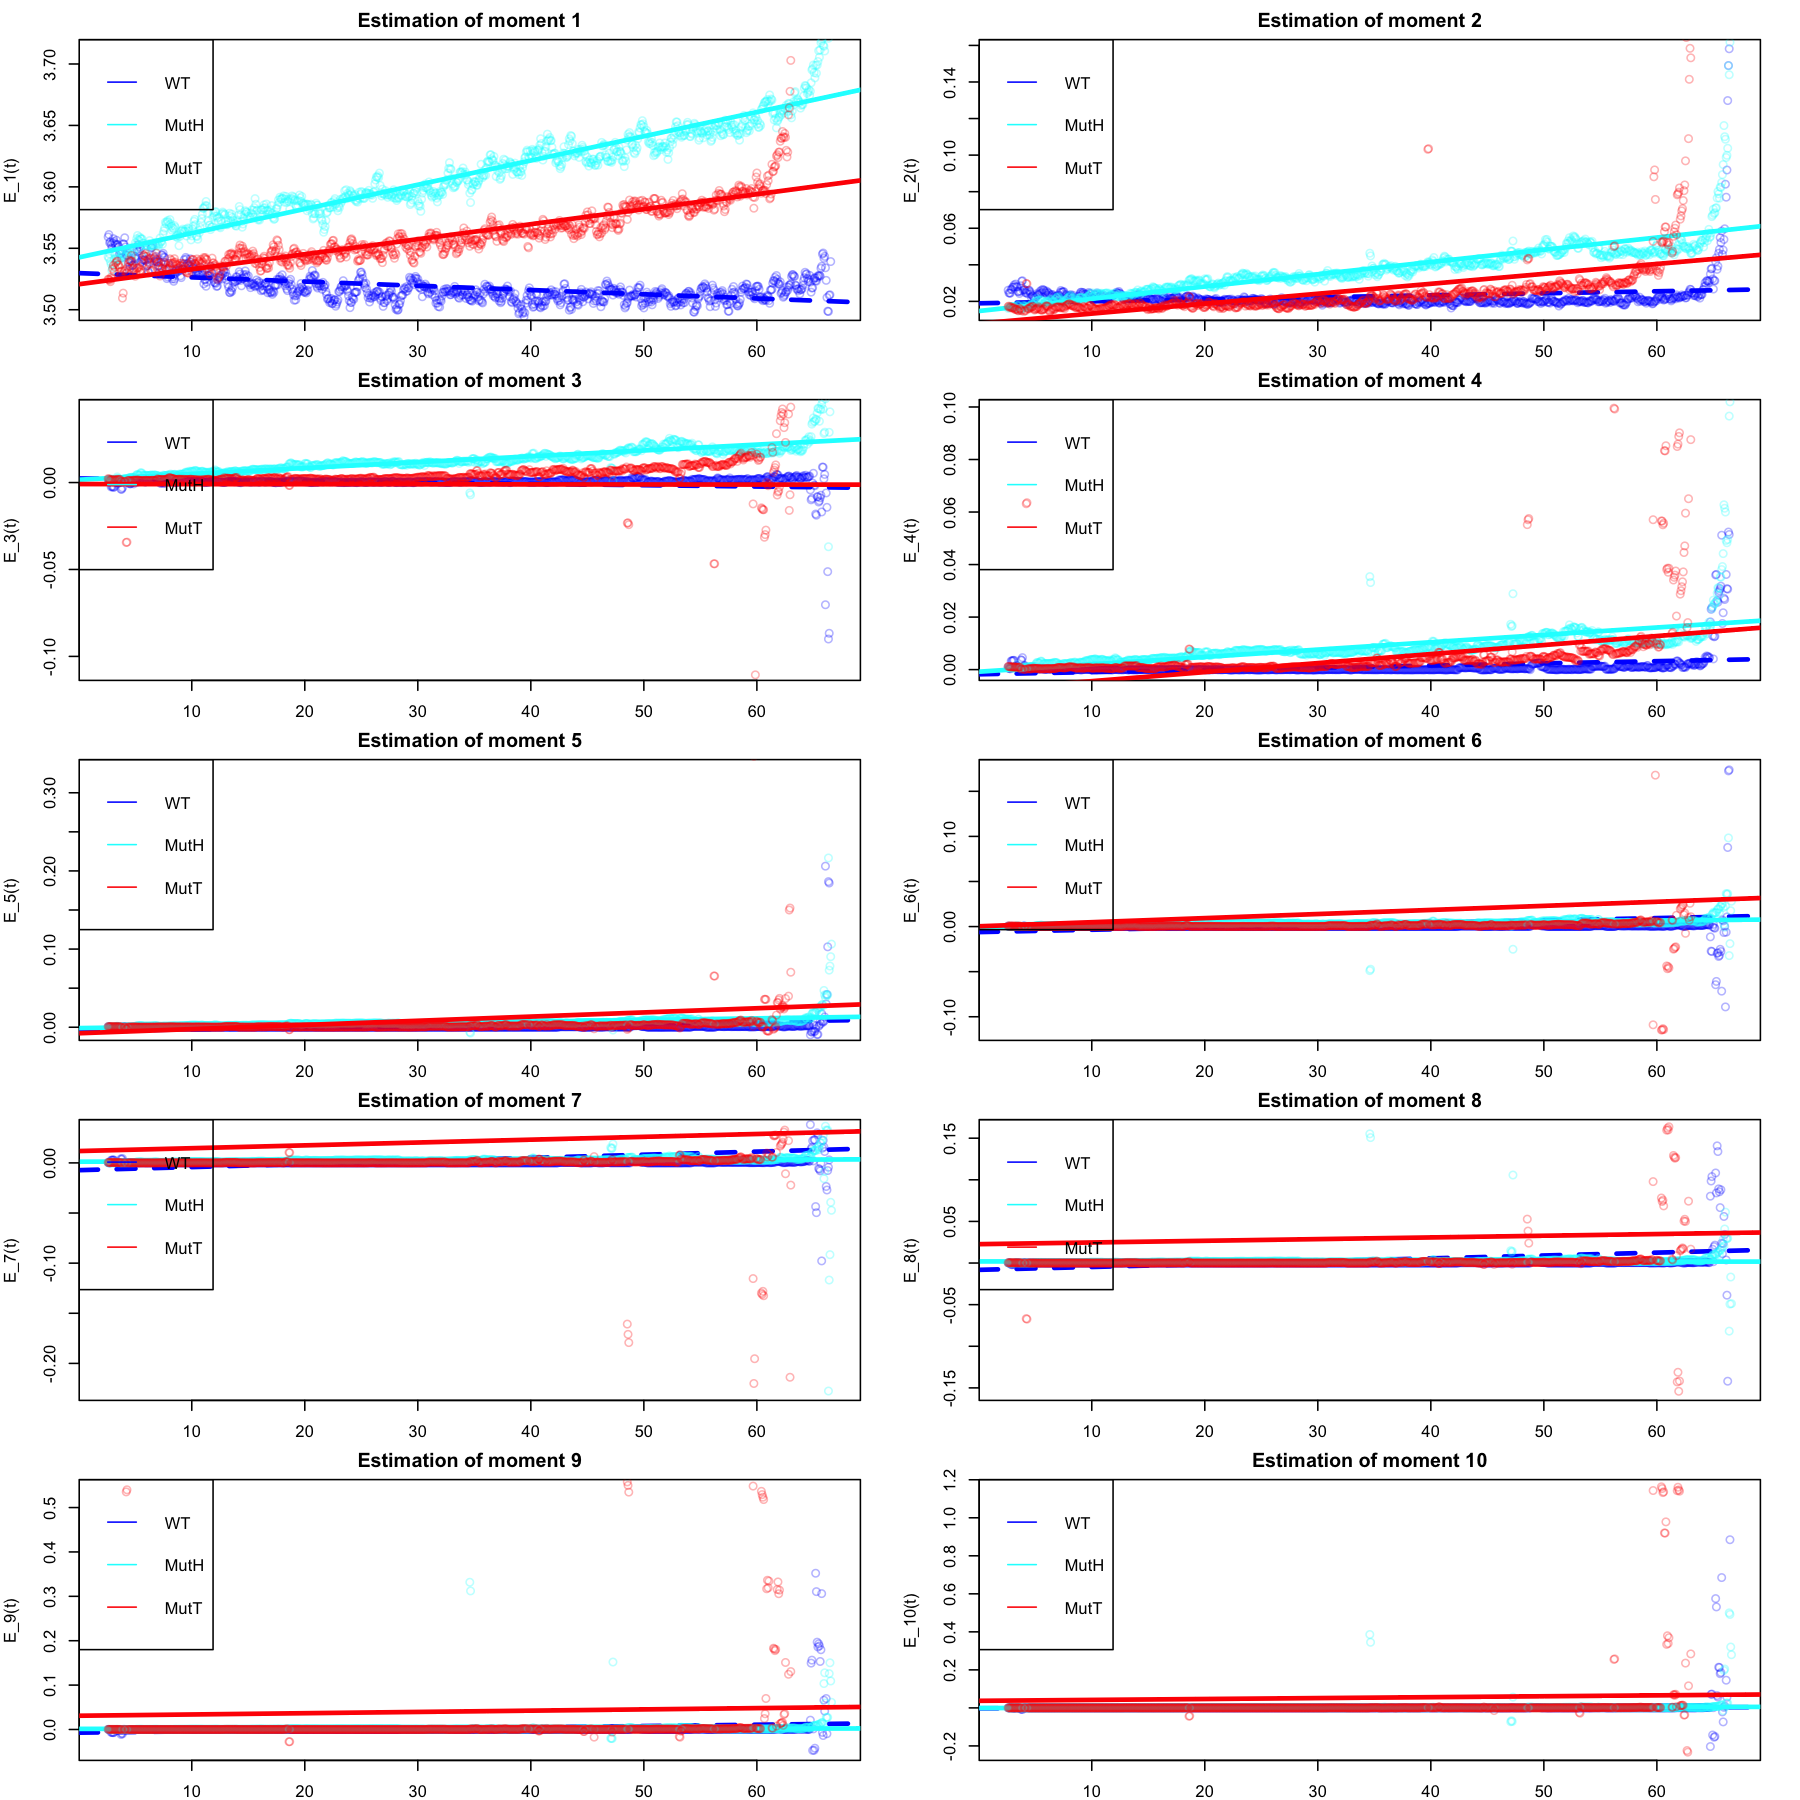

In [18]:
time_window=tmin:(tmax)
par(mfrow = c(5,2), mar = c(2, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 150)

N <- 10
#slopes <- data.frame(n = 1:N,
#                     slope_MutH = rep(NA,N), std_err_MutH = rep(NA,N), r2_MutH = rep(NA,N), resid_L1_MutH = rep(NA,N), resid_L2_MutH = rep(NA,N), 
#                     slope_WT = rep(NA,N), std_err_WT = rep(NA,N), r2_WT = rep(NA,N), resid_L1_WT = rep(NA,N), resid_L2_WT = rep(NA,N))
slopes <- data.frame(n = 1:N, 
                    slope_MutH = rep(NA,N),
                    slope_MutT = rep(NA,N), 
                    slope_MF1 = rep(NA,N),
                    slope_WT = rep(NA,N))

for (n in 1:N){
    df_n <- data.frame(time = microMA_MutH[time_window,]$time/60,
                     E_nt_MutH = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MutH[time_window,])),
                     E_nt_MutT = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MutT[time_window,])),
                     E_nt_WT = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_WT[time_window,])))
    
    
    ### WT
    plot(x = df_n$time, 
         y = df_n$E_nt_WT, 
         xlab = "Time (hr)",
         ylab = paste("E_", n, "(t)", sep = ""),
         col = alpha("blue", 0.3),
         main = paste("Estimation of moment", n),
         ylim = quantile(df_n[,c("E_nt_WT", "E_nt_MutH", "E_nt_MutT")], c(0.005, 0.995), na.rm=T))
    
    lin_reg_WT <- lm(E_nt_WT~time, data=df_n)
    abline(lin_reg_WT, col="blue", lty=2, lwd=3)
    #slopes[n,7:11] <- c(summary(lin_reg_WT)$coefficients[2,c(1,2)]/60, summary(lin_reg_WT)$r.squared, mean(abs(resid(lin_reg_WT))), sqrt(mean(resid(lin_reg_WT)**2)))
    slopes$slope_WT[n] <- c(summary(lin_reg_WT)$coefficients[2,c(1)]/60)
    
    
    
    ### MutH
    points(x = df_n$time, 
           y = df_n$E_nt_MutH, 
           col = alpha("cyan", 0.3))
    
    lin_reg_MutH <- lm(E_nt_MutH~time, data=df_n)
    abline(lin_reg_MutH, col="cyan", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MutH[n] <- c(summary(lin_reg_MutH)$coefficients[2,c(1)]/60)
    
        
    ### MutT
    points(x = df_n$time, 
           y = df_n$E_nt_MutT,
           col = alpha("red", 0.3))
    
    lin_reg_MutT <- lm(E_nt_MutT~time, data=df_n)
    abline(lin_reg_MutT, col="red", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MutT[n] <- c(summary(lin_reg_MutT)$coefficients[2,c(1)]/60)
    
    
    legend("topleft", legend = c("WT", "MutH", "MutT"), col=c("blue", "cyan", "red"), lty=1, seg.len = 1, text.width=3)
    
}

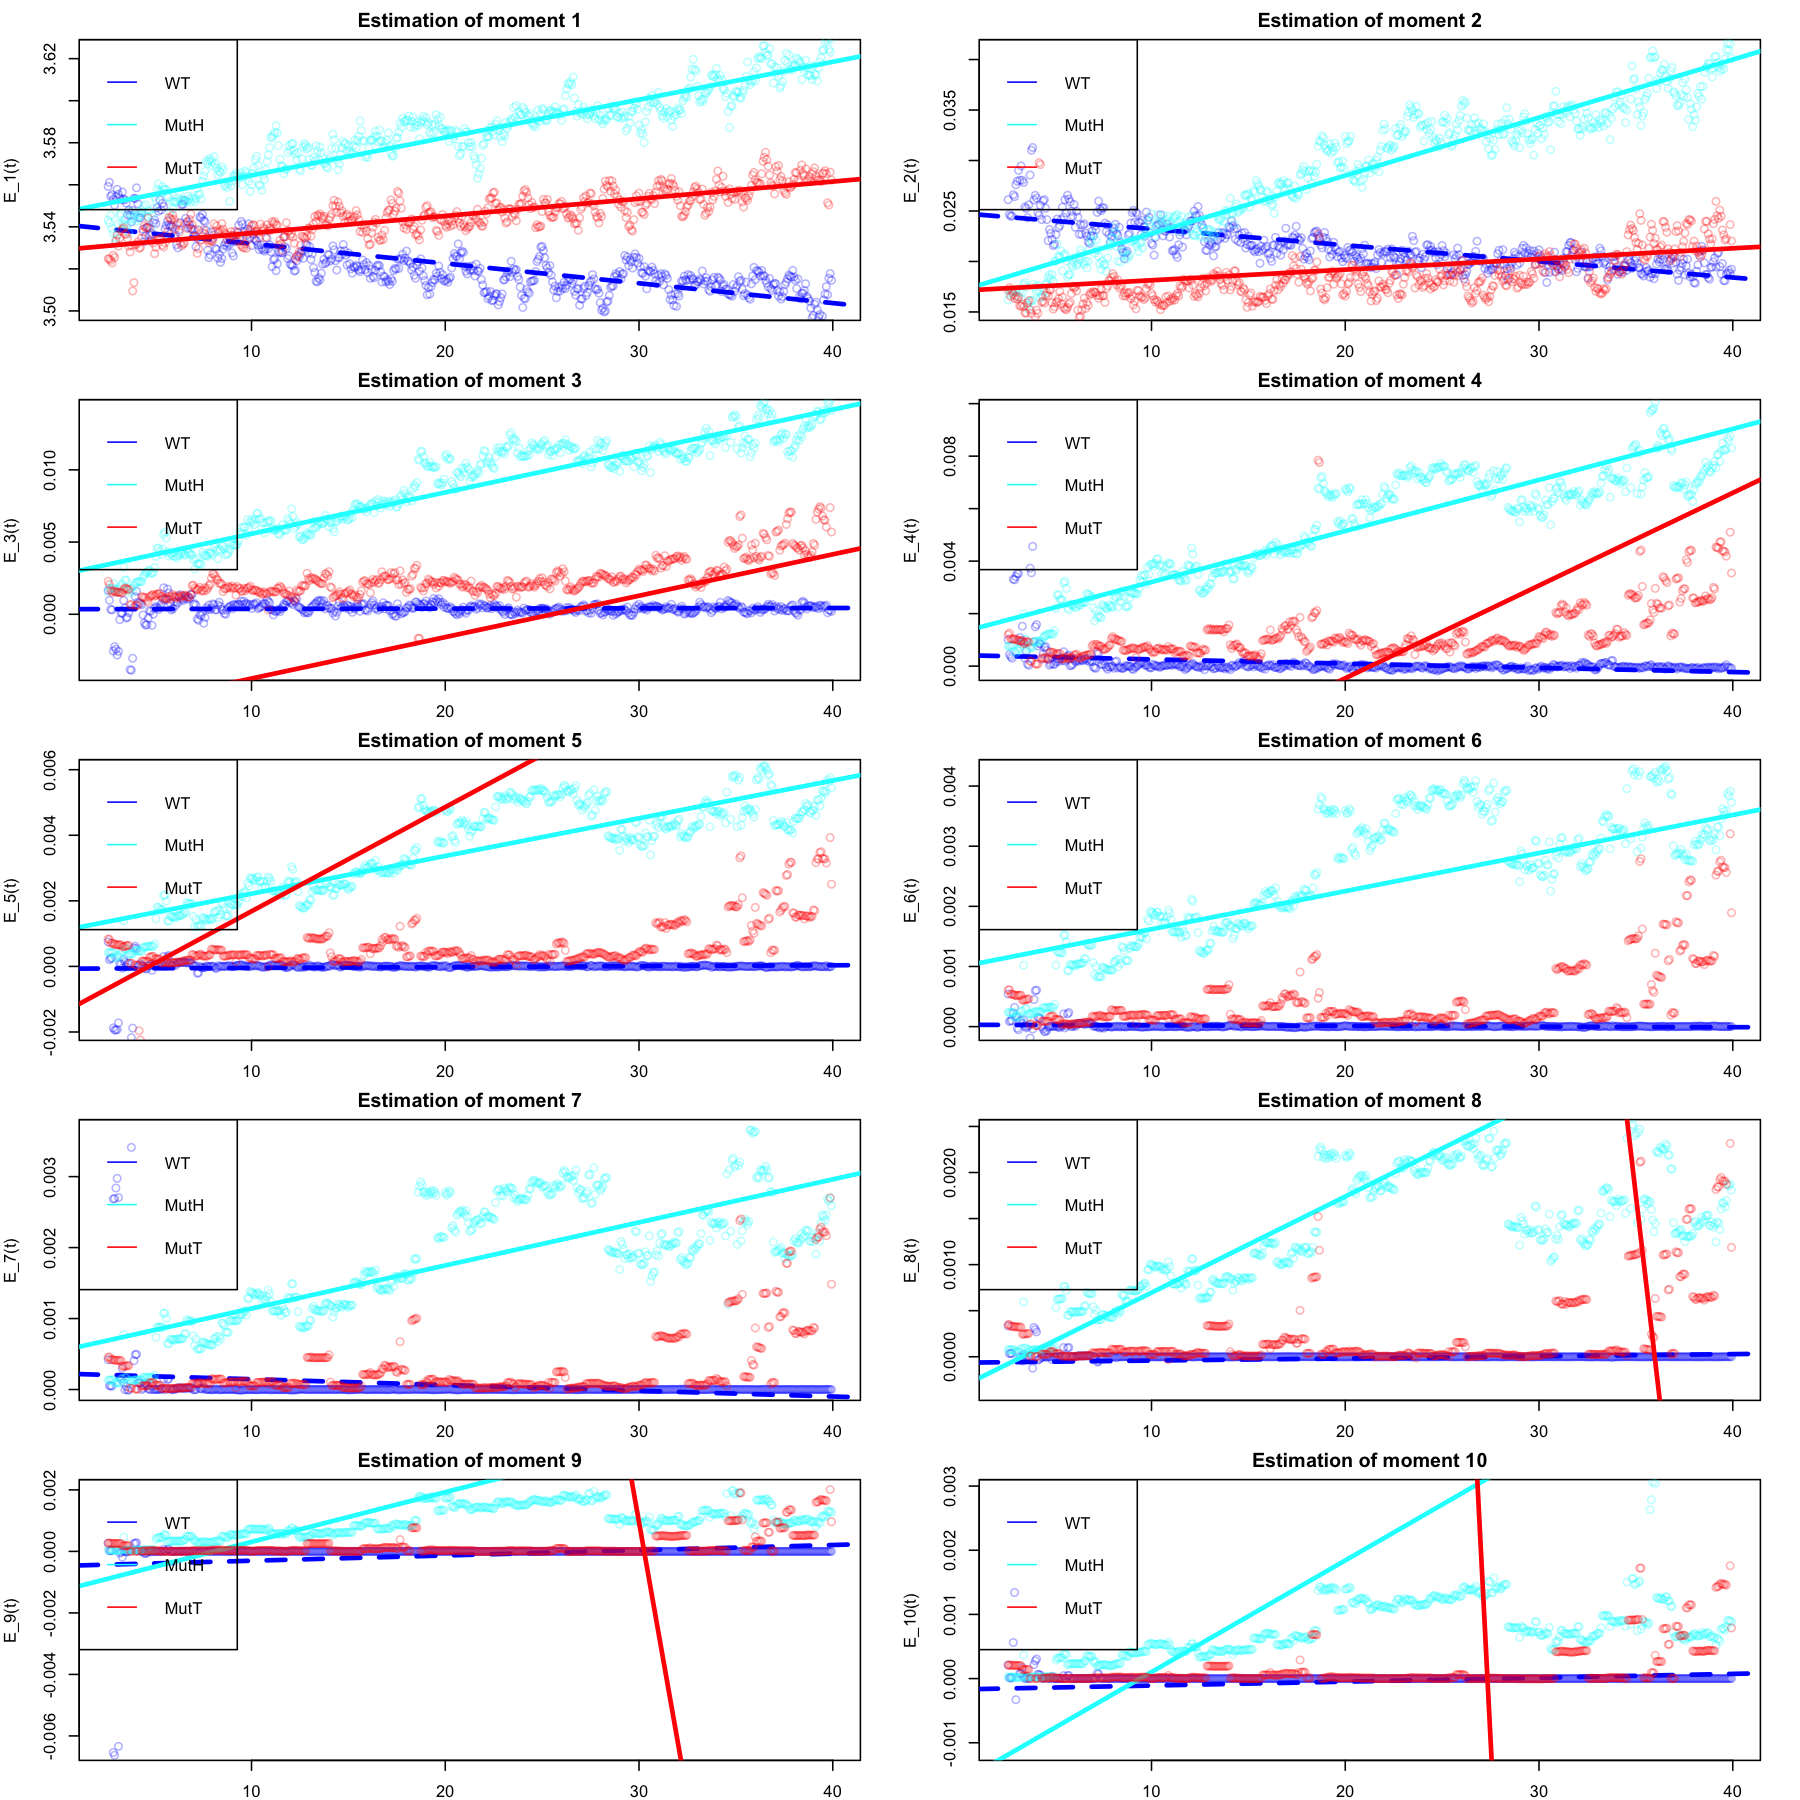

In [20]:
time_window=tmin:(tmax-40*10)
par(mfrow = c(5,2), mar = c(2, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 12, repr.plot.res = 150)

N <- 10
#slopes <- data.frame(n = 1:N,
#                     slope_MutH = rep(NA,N), std_err_MutH = rep(NA,N), r2_MutH = rep(NA,N), resid_L1_MutH = rep(NA,N), resid_L2_MutH = rep(NA,N), 
#                     slope_WT = rep(NA,N), std_err_WT = rep(NA,N), r2_WT = rep(NA,N), resid_L1_WT = rep(NA,N), resid_L2_WT = rep(NA,N))
slopes <- data.frame(n = 1:N, 
                    slope_MutH = rep(NA,N),
                    slope_MutT = rep(NA,N), 
                    slope_MF1 = rep(NA,N),
                    slope_WT = rep(NA,N))

for (n in 1:N){
    df_n <- data.frame(time = microMA_MutH[time_window,]$time/60,
                     E_nt_MutH = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MutH[time_window,])),
                     E_nt_MutT = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MutT[time_window,])),
                     E_nt_WT = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_WT[time_window,])))
    
    
    ### WT
    plot(x = df_n$time, 
         y = df_n$E_nt_WT, 
         xlab = "Time (hr)",
         ylab = paste("E_", n, "(t)", sep = ""),
         col = alpha("blue", 0.3),
         main = paste("Estimation of moment", n),
         ylim = quantile(df_n[,c("E_nt_WT", "E_nt_MutH", "E_nt_MutT")], c(0.005, 0.995), na.rm=T))
    
    lin_reg_WT <- lm(E_nt_WT~time, data=df_n)
    abline(lin_reg_WT, col="blue", lty=2, lwd=3)
    #slopes[n,7:11] <- c(summary(lin_reg_WT)$coefficients[2,c(1,2)]/60, summary(lin_reg_WT)$r.squared, mean(abs(resid(lin_reg_WT))), sqrt(mean(resid(lin_reg_WT)**2)))
    slopes$slope_WT[n] <- c(summary(lin_reg_WT)$coefficients[2,c(1)]/60)
    
    
    
    ### MutH
    points(x = df_n$time, 
           y = df_n$E_nt_MutH, 
           col = alpha("cyan", 0.3))
    
    lin_reg_MutH <- lm(E_nt_MutH~time, data=df_n)
    abline(lin_reg_MutH, col="cyan", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MutH[n] <- c(summary(lin_reg_MutH)$coefficients[2,c(1)]/60)
    
        
    ### MutT
    points(x = df_n$time, 
           y = df_n$E_nt_MutT,
           col = alpha("red", 0.3))
    
    lin_reg_MutT <- lm(E_nt_MutT~time, data=df_n)
    abline(lin_reg_MutT, col="red", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MutT[n] <- c(summary(lin_reg_MutT)$coefficients[2,c(1)]/60)
    
    
    legend("topleft", legend = c("WT", "MutH", "MutT"), col=c("blue", "cyan", "red"), lty=1, seg.len = 1, text.width=3)
    
}

![](Img/Moments_estimation.png)

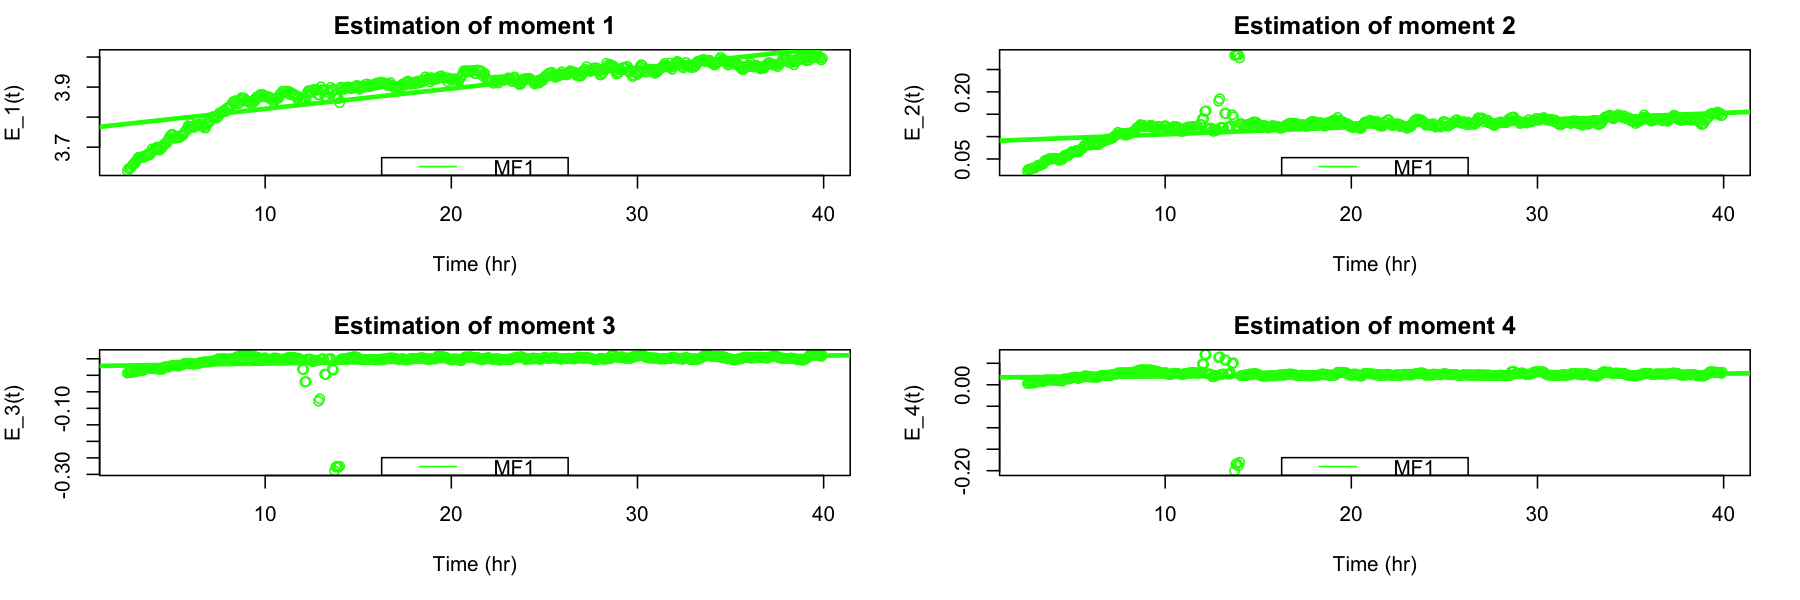

In [15]:
time_window=tmin:(tmax-40*10)
par(mfrow = c(2,2), mar = c(5, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 4, repr.plot.res = 150)

for (n in 1:4){
    df_n <- data.frame(time = microMA_MutH[time_window,]$time/60,
                     E_nt_MF1 = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MF1[time_window,])))

    
    ### MF1
    plot(x = df_n$time, 
         y = df_n$E_nt_MF1,
         xlab = "Time (hr)",
         ylab = paste("E_", n, "(t)", sep = ""),
         col = "green",
         main = paste("Estimation of moment", n))
    
    lin_reg_MF1 <- lm(E_nt_MF1~time, data=df_n)
    abline(lin_reg_MF1, col="green", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MF1[n] <- c(summary(lin_reg_MF1)$coefficients[2,c(1)]/60)

    
  legend("bottom", legend = c("MF1"), col=c("green"), lty=1, seg.len = 1, text.width=3)
    
}

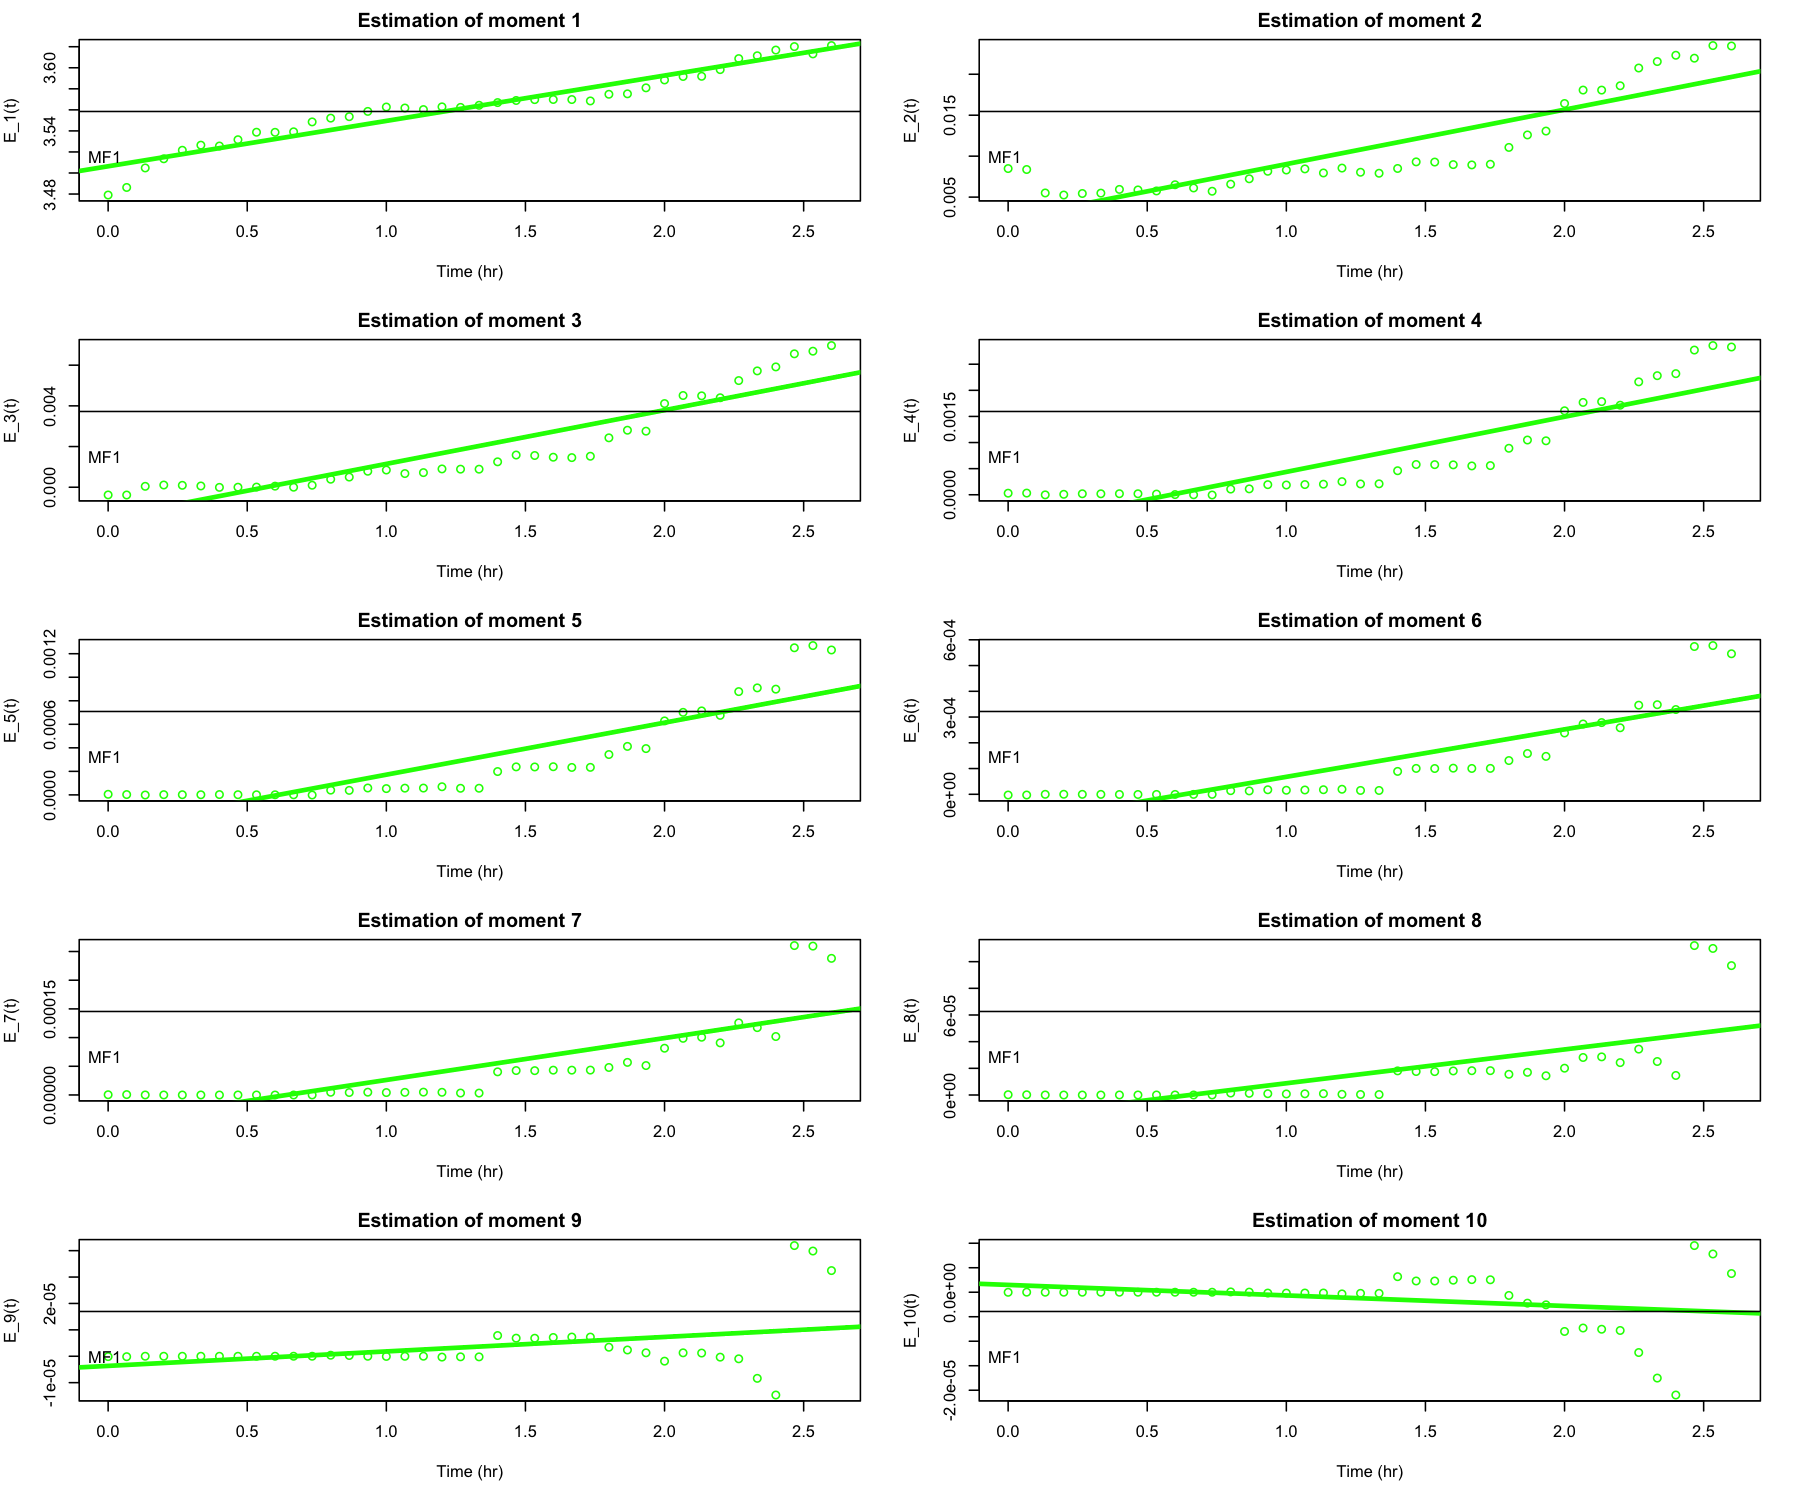

In [16]:
time_window=tmin:(tmax-40*25)
par(mfrow = c(5,2), mar = c(5, 4, 2, 2))
options(repr.plot.width = 12, repr.plot.height = 10, repr.plot.res = 150)

for (n in 1:N){
    df_n <- data.frame(time = microMA_MutH[time_window,]$time/60,
                     E_nt_MF1 = rowSums(sapply(1:n, log_choose, n=n, moments_expectations=moments_expectations_clean_MF1[time_window,])))

    
    ### MF1
    plot(x = df_n$time, 
         y = df_n$E_nt_MF1,
         xlab = "Time (hr)",
         ylab = paste("E_", n, "(t)", sep = ""),
         col = "green",
         main = paste("Estimation of moment", n))
    
    lin_reg_MF1 <- lm(E_nt_MF1~time, data=df_n)
    abline(lin_reg_MF1, col="green", lwd=3)
    #slopes[n,2:6] <- c(summary(lin_reg_MutH)$coefficients[2,c(1,2)]/60, summary(lin_reg_MutH)$r.squared, mean(abs(resid(lin_reg_MutH))), sqrt(mean(resid(lin_reg_MutH)**2)))
    slopes$slope_MF1[n] <- c(summary(lin_reg_MF1)$coefficients[2,c(1)]/60)

    
  legend("bottom", legend = c("MF1"), col=c("green"), lty=1, seg.len = 1, text.width=3)
    
}

In [17]:
mult_factor = c(10**5, 10**6, 10**6, rep(10**7, 7))
cbind(slopes[1], mult_factor=mult_factor, signif(slopes[-1], digits=2)*mult_factor)

n  mult_factor slope_MutH slope_MutT slope_MF1 slope_WT
1   1 1e+05        3.0          1.4      72.00    -1.600  
2   2 1e+06        9.6          1.8     110.00    -2.700  
3   3 1e+06        4.8          4.8      44.00     0.034  
4   4 1e+07       32.0         59.0     180.00    -2.700  
5   5 1e+07       19.0         53.0      74.00     0.440  
6   6 1e+07       11.0          8.3      31.00    -0.170  
7   7 1e+07       10.0       -100.0      12.00    -1.400  
8   8 1e+07       17.0       -300.0       4.20     0.390  
9   9 1e+07       27.0       -600.0       0.92     2.800  
10 10 1e+07       29.0       -990.0      -0.36     1.000

 ![](Img/Slope_values.png)